In [4]:
from modules import transfer_entropy as TE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data/Times_series_sa_det.csv")
lista = ["Atlanta-Sandy Springs-Alpharetta, GA MSA",
    "Baltimore-Columbia-Towson, MD MSA",
    "Boston-Cambridge-Newton, MA-NH MSA",
    "Chicago-Naperville-Elgin, IL-IN-WI MSA",
    "Dallas-Fort Worth-Arlington, TX MSA",
    "Denver-Aurora-Lakewood, CO MSA",
    "Detroit_Dearborn, MI MSA",
    "Houston-The Woodlands-Sugar Land, TX MSA",
    "Los Angeles-Long Beach-Anaheim, CA MSA",
    "Miami-Fort Lauderdale-West Palm Beach, FL MSA",
    "Minneapolis-St. Paul-Bloomington, MN-WI MSA",
    "New York-Newark-Jersey City, NY-NJ-PA MSA",
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",
    "Phoenix-Mesa-Chandler, AZ MSA",
    "Riverside-San Bernardino-Ontario, CA MSA",
    "San Francisco-Oakland-Berkeley, CA MSA",
    "Tampa-St. Petersburg-Clearwater, FL MSA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"]

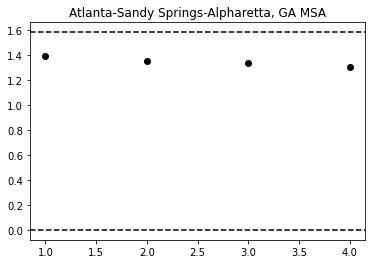

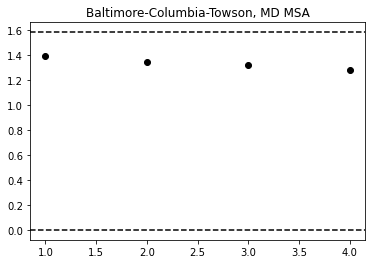

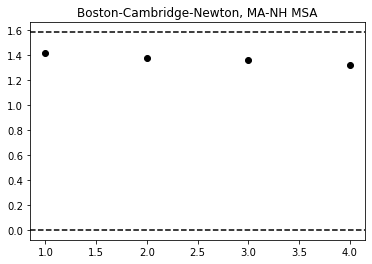

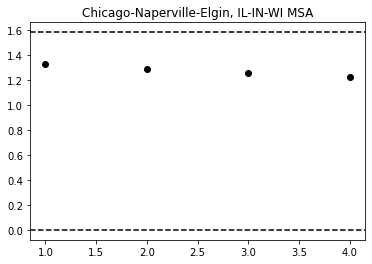

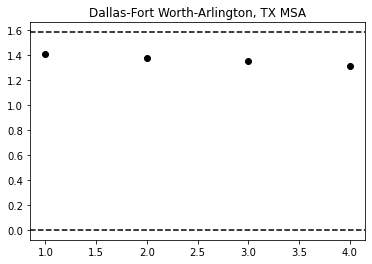

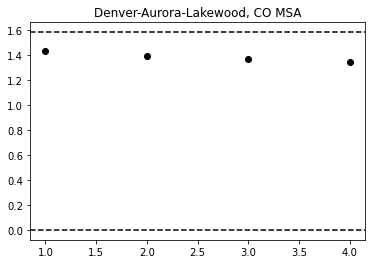

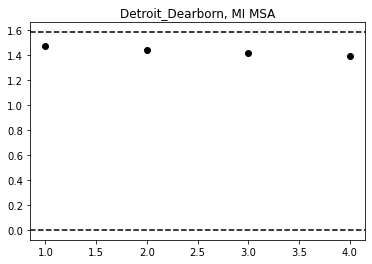

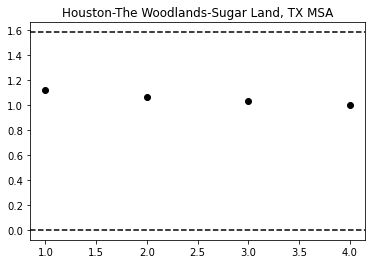

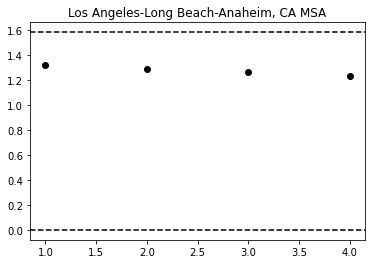

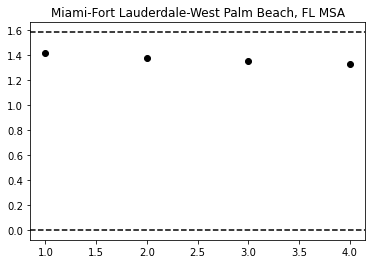

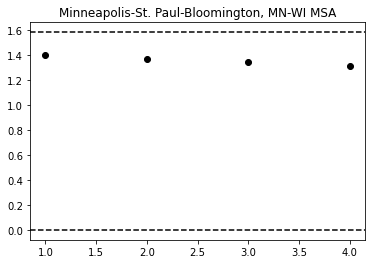

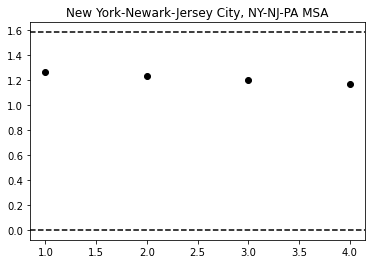

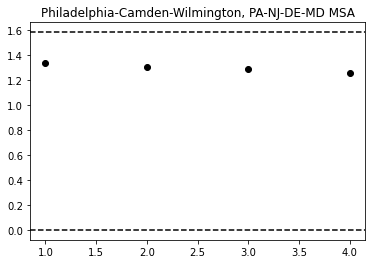

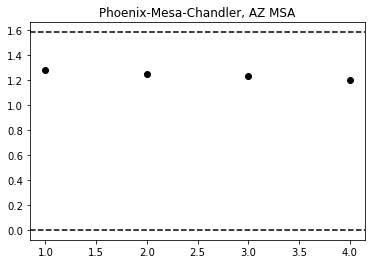

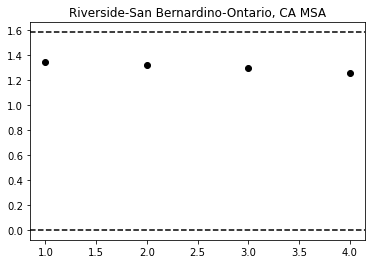

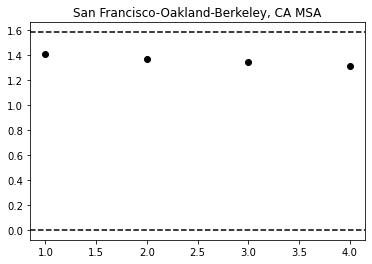

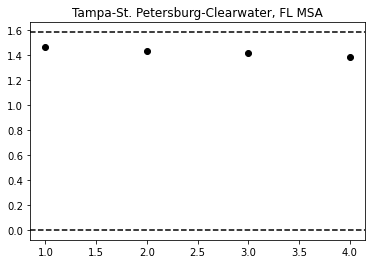

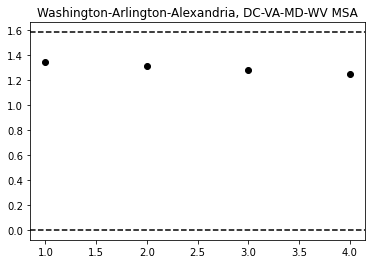

In [6]:
NegCond = []
histories = [2,3,4,5]
for l in lista:
    NT = TE.Median_Symbolise_3bins(df["Tweet search - "+l+"_sentNumber_Negative_sa_det"]).values
    tempneg = []
    for history in histories: 
        embeded_dynamics = TE.takensEmbedding(NT,1,history)
        Xt = embeded_dynamics[-1:][0]
        Xhis = TE.joint(embeded_dynamics[:-1])
        tempneg.append(TE.CondEntropy(Xt,Xhis))
        plt.scatter(history-1,TE.CondEntropy(Xt,Xhis), color = "k")
    NegCond.append(tempneg)
    plt.title(l)
    plt.axhline(y = TE.CondEntropy(NT,np.ones(len(NT))), color='k', linestyle='--')
    plt.axhline(y = 0, color='k', linestyle='--')
    plt.show()    

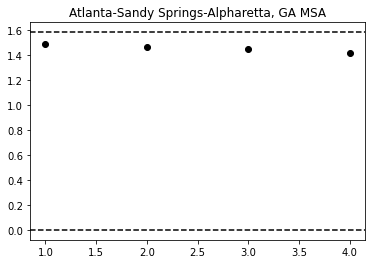

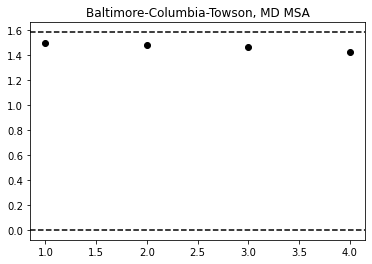

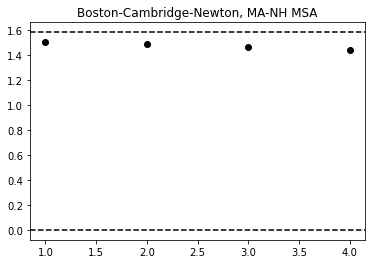

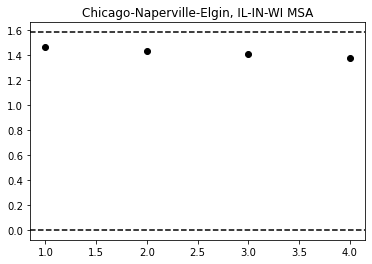

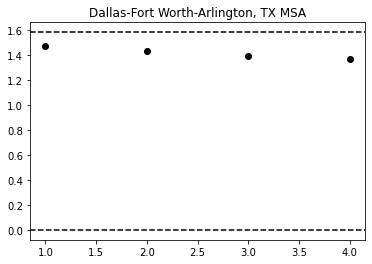

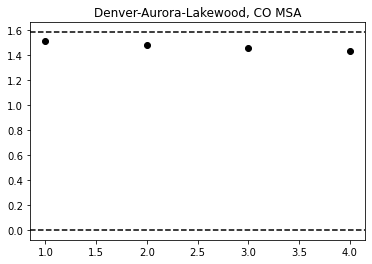

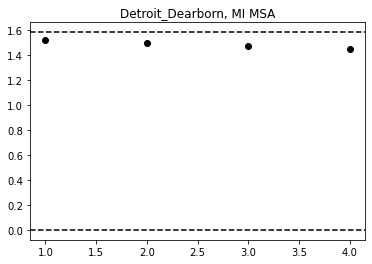

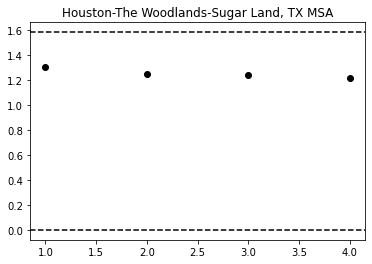

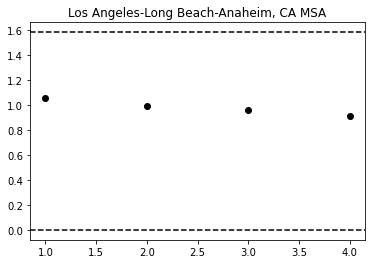

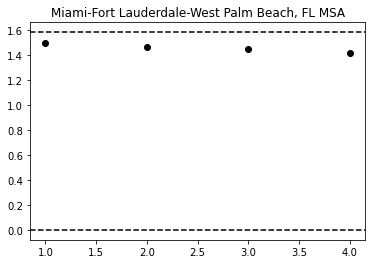

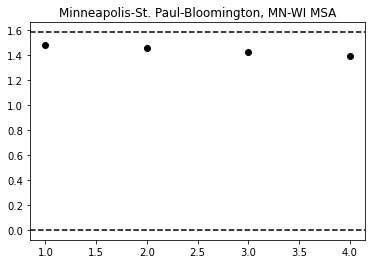

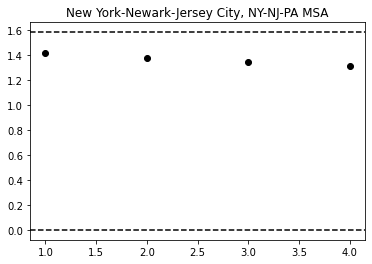

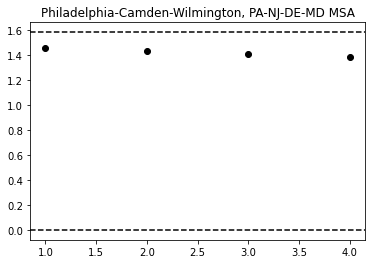

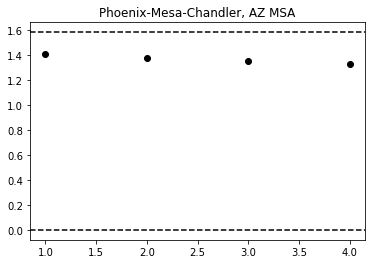

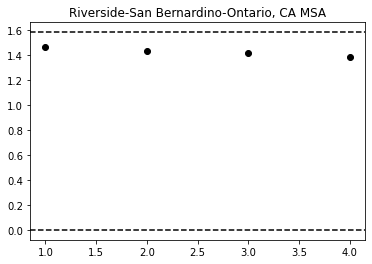

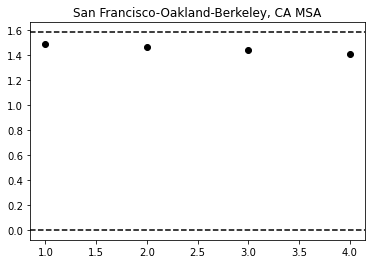

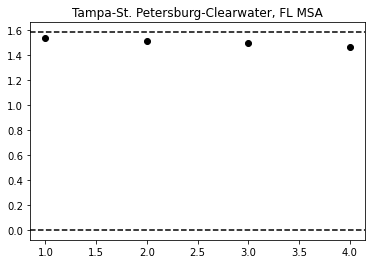

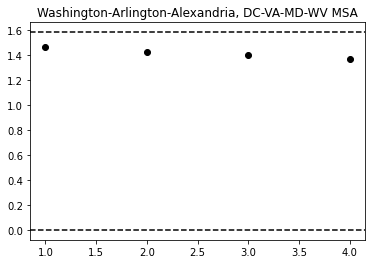

In [7]:
PosCond = []
for l in lista:
    NT = TE.Median_Symbolise_3bins(df["Tweet search - "+l+"_sentNumber_Positive_sa_det"]).values
    temppos = []
    for history in histories: 
        embeded_dynamics = TE.takensEmbedding(NT,1,history)
        Xt = embeded_dynamics[-1:][0]
        Xhis = TE.joint(embeded_dynamics[:-1])
        temppos.append(TE.CondEntropy(Xt,Xhis))
        plt.scatter(history-1,TE.CondEntropy(Xt,Xhis), color = "k")
    PosCond.append(temppos)
    plt.title(l)
    plt.axhline(y = TE.CondEntropy(NT,np.ones(len(NT))), color='k', linestyle='--')
    plt.axhline(y = 0, color='k', linestyle='--')
    plt.show()